# Housing price modelling in King County, USA

In this script we consider regression problem, that means we want to predict continous value of desired variable. In our dataset we have 'price' variable associated with price. This is our target variable which values we want to be able to predict. There is one additional variable 'price_bin' with 0 and 1 as values, where 0 means certain house is <=\\$1 mln worth, value 1 means it is > \\$1 mln worth. Normally we probably will not have that variable in real case, but let's do the hack and use it in models (in given assignment it is not forbidden to use it). The rest of variables we may treat like potential explanatory variables. To get the best model we need firstly to prepare dataset, choose model metrics, build model, optimize the model hyperparameters and assess the model.

### Agenda

1. Data exploration
1. Data preparation
3. Data modelling
4. Models evaluation
5. Choosen model optimization

## 1. Data exploration

Data exploration is a first step to enable power of data. We need to understand business background and meaning of data to specify proper mehods for problem solving. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file
df_01 = pd.read_csv('house.csv')

In [3]:
# Show basic informations about data
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
price_bin        21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In the table above we may see that dataset is very clear, no missings, almost all variables are numeric. 

In [4]:
df_01.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We need to divide dataset to explanatory part, and target part, which is needed to produce proper data structures as an input to data modelling algorithms. We need this disivion before data preparation to not allow for data leakage where information from training part leak to test part, or reversed. 

In [5]:
# select explanatory variables names
cols_X = [col for col in df_01.columns if col not in ['id','price']]
cols_X

['date',
 'price_bin',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# select explanatory variables
df_X = df_01[cols_X]
df_X[0:10]

,date,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df_X.date[0:10]

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
5    20140512T000000
6    20140627T000000
7    20150115T000000
8    20150415T000000
9    20150312T000000
Name: date, dtype: object

## 2. Data preparation

Feature engineering is the key to reach high prediction performance. Below we try to convert and bin date variable to involve it to explanatory variables set.

In [8]:
# Date variable binning
import time
dates = []
##timestamp_02 = list(enumerate(timestamp))
for i in range(len(df_X.date)):
    ts = time.strptime(df_X.date[i][:19], "%Y%m%dT%H%M%S")
    if time.strftime("%m", ts)[0] == '0':
        dates.append(time.strftime("%m", ts)[1])
    else:
        dates.append(time.strftime("%m", ts))


In [9]:
# Add binned variable as a column to a dataframe
df_X['date2'] = dates

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df_X

,date,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2
0,20141013T000000,0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,20141209T000000,0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,20150225T000000,0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,20141209T000000,0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,20150218T000000,0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,20150223T000000,0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2
21610,20140623T000000,0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,20150116T000000,0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1


In [11]:
# Delete date variable after binning
del df_X['date']

In [12]:
# Convert all variables to float
df_X = df_X.astype(float)
# = df['DataFrame Column'] = df['DataFrame Column']

In [13]:
df_X.dtypes

price_bin        float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date2            float64
dtype: object

In [14]:
# select response variable
df_Y = df_01['price']
df_Y[0:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## Feature importance

There are many features in dataset, and some are more useful from another. If feature represents very low level of target variable variance, or close to zero, it may even decrease model performance.

So when improving model, we may experiment with poping out less useful variables.

We may measure feature contribution to prediction of target variable for example with Extra Trees Classifier.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
# Extract ndarrays
Y = df_Y.values
X = df_X.values

### ExtraTreesClassifier importance

In [17]:
# data modelling
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

# feature importance extraction
model.feature_importances_

array([0.0013855 , 0.04141456, 0.0477402 , 0.07894161, 0.08177818,
       0.01615281, 0.00088094, 0.01069081, 0.03190734, 0.02753095,
       0.07807441, 0.03795608, 0.07587321, 0.00682214, 0.05742622,
       0.08631548, 0.07876456, 0.08056577, 0.07953924, 0.08024002])

In [18]:
feature_importance = pd.DataFrame(model.feature_importances_,columns=['v'])
feature_importance.iloc[0:5]

,v
0,0.001386
1,0.041415
2,0.047740
3,0.078942
4,0.081778


In [19]:
# select explanatory variables names
cols_X = [col for col in df_X.columns if col not in ['id','price']]
cols_X

['price_bin',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date2']

In [20]:
# Sorting 
feature_importance = pd.concat([pd.DataFrame([cols_X]).T,feature_importance], axis = 1)

In [21]:
feature_importance.iloc[0:]

,0,v
0,price_bin,0.001386
1,bedrooms,0.041415
2,bathrooms,0.047740
3,sqft_living,0.078942
4,sqft_lot,0.081778
5,floors,0.016153
6,waterfront,0.000881
7,view,0.010691
8,condition,0.031907
9,grade,0.027531


In [22]:
# Sort values
feature_importance_sorted = feature_importance.sort_values(by='v', axis = 0, ascending=False)

In [23]:
feature_importance_sorted[:]

,0,v
15,lat,0.086315
4,sqft_lot,0.081778
17,sqft_living15,0.080566
19,date2,0.080240
18,sqft_lot15,0.079539
3,sqft_living,0.078942
16,long,0.078765
10,sqft_above,0.078074
12,yr_built,0.075873
14,zipcode,0.057426


As we may see in table above, when will be experimenting with improving model performance, variables 6, 0, 13 will be the very first variables to try training model without.

In [24]:
# X = np.delete(X,[5],1)
#del df_X['yr_renovated']
#del df_X['price_bin']
#del df_X['waterfront']

In [25]:
df_X.columns

Index(['price_bin', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date2'],
      dtype='object')

Nevertheless during experimentation there was found no improvement while deleting even the worst variables, which were able to do small improvements of MAE.

### Correlation matrix
To reach high performance of modelling, features should be not highly correlated. If we see strong correlation, we may use many techniques to eliminate correlation. There are many ways: 
1. We may use PCA on that group
2. Choose representant of highly correlated variables groups. 
3. Use data whitening transformation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

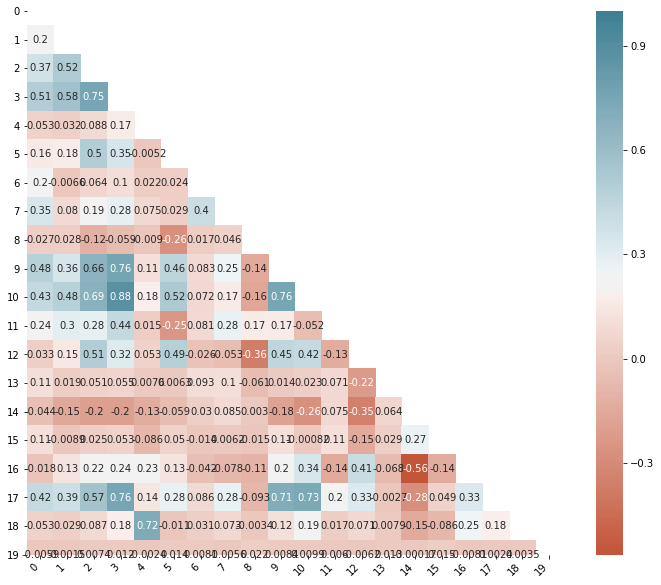

In [27]:
# Create heatmap using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
mask = np.zeros_like(cor, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
chart = sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), mask=mask)#,cmap=plt.cm.Reds)
# Rotate labels on Y axis for better view
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
# Rotate labels on X axis for better view
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

However, during experimentation merging variables with PCA has not shown any improvement in MAE. It shows that even in case of strongly correlated variables in our circumstances their little variance diversity may improvement model performance.

In [28]:
# Extract ndarray again after variables modifications
X = df_X.values

### Feature Scaling
To assure high performance of algorithms, data should be standarized - transform data to state with mean = 0 and STD = 1.

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

## 3. Data modelling and evaluation

For predicting houses prices we need to use algorithms solving regression problems.

For initial modelling we need to divide dataset to training and test part to properly measure models performance. We will use simple measure of MAE - Mean Absolute Error, which is easy to interpret. On further stages, we may use more sofisticated mothods like cross validation to reduce uncertainty of measures.

In [30]:
# Divide on training and validation dataset
from sklearn.model_selection import train_test_split

# split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)
# ‘random_state’ just ensures that we get reproducible results every time.
# data - must be all X variables (pandas df / ndarray)
# target - must be Y variable (pandas df / ndarray)


### Linear regression

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [32]:
# Create and fit linear model
model_01 = LinearRegression().fit(X_train, Y_train)

### Evaluation

In [33]:
# Coefficient of determination on train set
r2_train_01 = model_01.score(X_train, Y_train)
print(r2_train_01)
# Coefficient of determination on test set
r2_test_01 = model_01.score(X_test, Y_test)
print(r2_test_01)

0.7924886457484697
0.7851984743284411


Above we may see how well data is fitted to regression line.

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
Y_pred_01 = model_01.predict(X_test)

In [36]:
Y_test_01 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_01 = np.expand_dims(Y_pred_01, axis=0) # (added one more dim)


In [37]:
# Calculate mean absolute error
MAE_01 = mean_absolute_error(Y_test_01[0].tolist(), Y_pred_01[0].tolist())
MAE_01

102424.71561555617

Result - Mean Absolute Error over 100_000, good for a start...

### XGBoost

In [38]:
from xgboost import XGBRegressor

In [39]:
# Create and fit XGBoost model
model_02 = XGBRegressor()
model_02.fit(X_train, Y_train)

[05:51:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Evaluation

In [40]:
X_test.shape

(6484, 20)

In [41]:
Y_test.T.shape

(6484,)

In [77]:
# Coefficient of determination on train set
r2_train_02 = model_02.score(X_train,Y_train.T) # R2
print(r2_train_02)
# Coefficient of determination on test set
r2_test_02 = model_02.score(X_test,Y_test.T) # R2
print(r2_test_02)


0.9174276334014555
0.8922164378462739


We may see that XGBoost model fitting expressed in R2 is much better than LM model. We also may see model is not much overfitted - difference between R2 on train and test set is low.  

In [43]:
# Predict values on test set
Y_pred_02 = model_02.predict(X_test)

#### Compare actual and predicted value in table

In [44]:
Y_test_02 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_02 = np.expand_dims(Y_pred_02, axis=0) # (added one more dim)


In [45]:
Y_test_Y_pred_02 = np.concatenate((Y_test_02.T, Y_pred_02.T), axis=1)

In [46]:
Y_test_Y_pred_02

array([[323000.     , 308696.     ],
       [690000.     , 654107.8125 ],
       [142000.     , 244082.84375],
       ...,
       [435000.     , 536471.8125 ],
       [492000.     , 573290.375  ],
       [480000.     , 472103.     ]])

#### Calculate

In [47]:
# Calculate mean absolute error
MAE_02 = mean_absolute_error(Y_test_02[0].tolist(), Y_pred_02[0].tolist())

In [48]:
# Check Calculate mean absolute error
float(sum(abs(Y_test_02[0] - Y_pred_02[0])))/len(Y_test_02.tolist()[0])
# numpy floats had to be converted to float due to facilitate calculations

72001.04099514188

In [49]:
# Check Calculate mean squared error
float(sum((Y_test_02[0] - Y_pred_02[0])**2))/len(Y_test_02.tolist()[0])
# numpy floats had to be converted to float due to facilitate calculations

14883626195.214249

#### Result: MAE 75545.63323662091

The average price is circa 540_000 Dollars and mean absolute error is 75_545 Dollars


### Support Vector Machine Regressor

In [50]:
from sklearn.svm import SVR

In [51]:
# Create and fit SVM regressor model
model_04 = SVR(kernel='rbf').fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation

In [52]:
Y_pred_04 = model_04.predict(X_test)

In [53]:
Y_test_04 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_04 = np.expand_dims(Y_pred_04, axis=0) # (added one more dim)


In [54]:
# Calculate mean absolute error
MAE_04 = mean_absolute_error(Y_test_04[0].tolist(), Y_pred_04[0].tolist())
MAE_04

219583.24449674253

### K-nearest Neighbours Regressor

In [55]:
#import required packages
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt

In [56]:
MAE_val = [] #to store MAE values for different k
MAE_05 = 10000000.0
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_absolute_error(Y_test,pred) #calculate MAE
    MAE_val.append(error) #store rmse values
    print('MAE value for k= ' , K , 'is:', error)
MAE_05 = min(MAE_val)
    # Return lowest error due to early stopping to prevent overfitting
    #if error < MAE_05:
    #    MAE_05 = error


MAE value for k=  1 is: 102425.15391733497
MAE value for k=  2 is: 90517.02136027144
MAE value for k=  3 is: 85814.94216533004
MAE value for k=  4 is: 84437.71294725478
MAE value for k=  5 is: 83269.01477483034
MAE value for k=  6 is: 82807.92360682705
MAE value for k=  7 is: 82220.44939190976
MAE value for k=  8 is: 82407.4601519124
MAE value for k=  9 is: 82443.29383439578
MAE value for k=  10 is: 82745.13127698952


## 4. Models evaluation

In this section we will compare models performance basing on MAE score. 

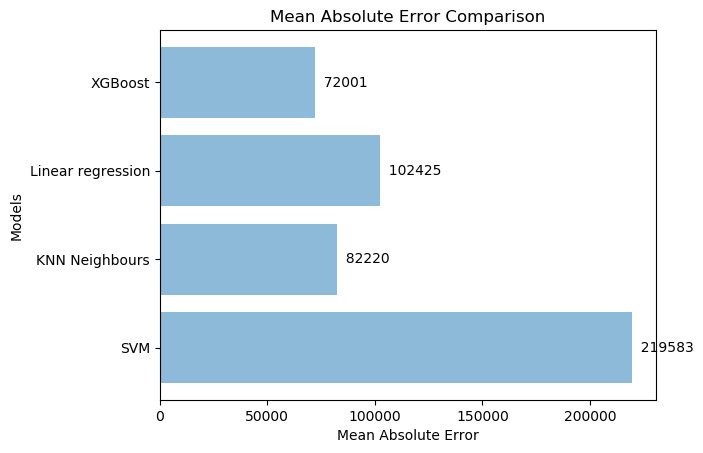

In [57]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Converting numpy floats to floats
MAE_01= float(MAE_01)
MAE_02= float(MAE_02)
#MAE_03= float(MAE_03)
MAE_04= float(MAE_04)
MAE_05= float(MAE_05)

# Create list of names visible on X axis
objects = ('SVM','KNN Neighbours','Linear regression', 'XGBoost')
# Round performance
MAE = [round(i) for i in list([MAE_04,MAE_05, MAE_01,MAE_02,])]
# Calculate number of positions on Y axis
y_pos = np.arange(len(MAE))

# Create horizontal barpplot
plt.barh(y_pos, MAE, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Models')
plt.title('Mean Absolute Error Comparison')

# Add Names to the chart
for i, v in enumerate(MAE):
    plt.text(v, i, "  "+str(v), color='black', va='center', fontweight='normal')
plt.show()

As we can see in chart above that XGBoost is the most promising model, and on optimizing this model we will concentrate.

## 5. Best model optimization

For model hyperparameters optimization we will use Random Search. In addition to searching hyperspaces, we also incorporate cross-validation technique, to be more sure that our results for each set of hyperparameters are certain, and are not just matter of luck due to favourable division on training and test set.

In case of cross-validation we will have actually training set, validation set and test set. Before we had only training and test set.

Further training and validation sets in cross-validation are created from previous training set. And finally, model is tested on test set.

Lets check which evaluation scores are available in sklearn

In [58]:
import sklearn

In [59]:
# Show available metrics in sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

Our MAE score is available in inversed version "neg_mean_absolute_error", I it will be used in evaluation.

### Cross-validation and random search hyperparameters optimization

Below, we use RandomizedSearchCV method from Scikit-learn package for XGBoost hyperparameters tuning. Metaheuristic method used in this case is Grid Search combined with Random Search, which allows us to randomly pick sets of parameters from given intervals and verify model performance. Model assessment is more stable due to cross-validation method, which divide our dataset on k-folds, test model performance on each on them, and compute mean value. This resampling method harness statistical robustness to assess how our model will behave on totally new datasets.

XGBoost alorithm is ensemble machine learning method - it uses a few machine learning techniques. Main technique is boosting, which means that it generates sequence of trees using different subsets of training set, and consecutive trees use information from previous trees. Below we will use implementation of the scikit-learn API for XGBoost. According to documentation algorithm has several dozen parameters: https://xgboost.readthedocs.io/en/latest/python/python_api.html.
Parameters choosen for optimization in this notebook are:
1. n_estimators (int) - number of trees generated in sequence
2. learning_rate (float) - Boosting learning rate (xgb’s “eta”)
3. subsample (float) - Subsample ratio of the training instance
4. max_depth (int) - Regularization parameter. Maximum tree depth for base learners. If lower parameter, trees are more shallow.
5. colsample_bytree (float) - Subsample ratio of columns when constructing each tree.
6. min_child_weight - (int) - Minimum sum of instance weight(hessian) needed in a child
7. gamma - (float) – Regularization parameter. "Minimum loss reduction required to make a further partition on a leaf node of the tree". In another words, in consecutive trees generation, higher loss reduction is needed to add forther nodes to trees. It makes trees more trimmed, less complex, less prone to overfitting. Another definiton of gamma parameter is "complexity cost by introducing additional leaf".


In [73]:
from scipy import stats
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error 


"""
#param_distributions = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              #'min_child_weight': [1, 2, 3],
              'gamma': [40, 50, 60]
             }
"""

# Defining parameters which we need to iterate over RS cycles
param_distributions = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              #'min_child_weight': [1, 2, 3],
              'gamma': [0, 10, 20, 40, 50]
             }
# in frozen uniforms above eg. stats.randint(), first number 
# is lower boundary of range, and second is a bandwidth

# Initilize estimator
model_11 = XGBRegressor()

"""
rs = RandomizedSearchCV(model_11, param_distributions, n_iter=6, scoring='neg_mean_absolute_error', cv=4, 
                         verbose=4, n_jobs=-1, random_state=2019)
                         """

# Random Search CV setting
rs = RandomizedSearchCV(model_11, param_distributions, n_iter=200, scoring='neg_mean_absolute_error', cv=10, 
                         verbose=4, n_jobs=-1, random_state=2019)
                        # n_iter - is the total iterations on hyperparameters dataset
                        # (Final results was produced setting up 1000 iterations over there)
                        # cv=4 - number of folds in Cross Validation 
                        # n_jobs=-1 - there will be all available cores used on a machine which run code
                        # verbose=4 - it displays additional information during optimization, if > 0

# Run Random Search with cross-validation
rs_results = rs.fit(X_train, Y_train)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 126.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 163.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 214.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 216.2min finished


[23:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
# Evaluation

print("BEST PARAMETERS: " + str(rs_results.best_params_))
print("\nMEAN MAE SCORE IN CV WITH BEST PARAMETERS: " + str(rs_results.best_score_))

# Predict with best parametrized model on training set
y_pred_train = rs.predict(X_train)
# Scoring on train set
score = mean_absolute_error(Y_train, y_pred_train)
print("\nMean Absolute Error - SCORE ON TRAIN DATA: {}".format(score))

# Predict with best parametrized model on test set
y_pred = rs.predict(X_test)
# Scoring on test set
score = mean_absolute_error(Y_test, y_pred)
print("\nMean Absolute Error - SCORE ON TEST DATA: {}".format(score))

# Median Squared Error on training set
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
print("\nMedian Squared Error - SCORE ON TRAIN DATA: {}".format(median_absolute_error(Y_train, y_pred_train)))

# Median Squared Error on test training set
print("\nMedian Squared Error - SCORE ON TEST DATA: {}".format(median_absolute_error(Y_test, y_pred)))


BEST PARAMETERS: {'colsample_bytree': 0.7540439218263817, 'gamma': 0, 'learning_rate': 0.031858586566719346, 'max_depth': 8, 'n_estimators': 483, 'subsample': 0.9165579213623491}

MEAN MAE SCORE IN CV WITH BEST PARAMETERS: -58574.29418924334

Mean Absolute Error - SCORE ON TRAIN DATA: 29107.730687958556

Mean Absolute Error - SCORE ON TEST DATA: 58592.98350988973

Median Squared Error - SCORE ON TRAIN DATA: 21225.40625

Median Squared Error - SCORE ON TEST DATA: 35522.328125


### Final model score comparison on test set

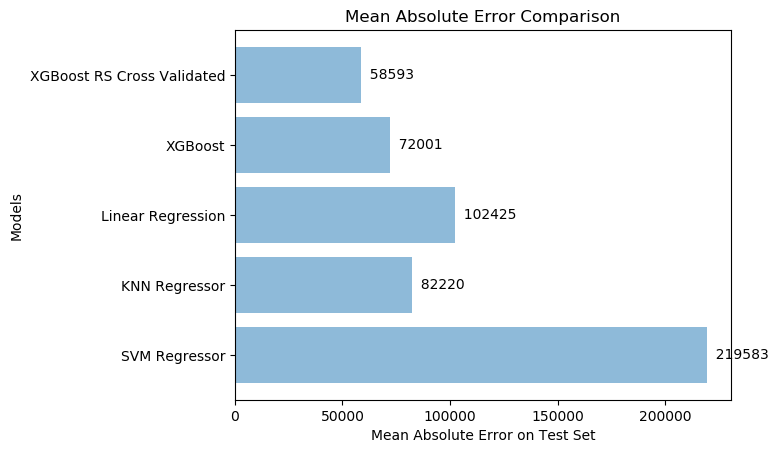

In [76]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Converting numpy floats to floats
MAE_01= float(MAE_01)
MAE_02= float(MAE_02)
#MAE_03= float(MAE_03)
MAE_04= float(MAE_04)
MAE_05= float(MAE_05)
MAE_06= float(score)

# Create tuple of Y axis labels
objects = ('SVM Regressor','KNN Regressor','Linear Regression', 'XGBoost','XGBoost RS Cross Validated')
# Create list of MAE scores
MAE = [round(i) for i in list([MAE_04,MAE_05,MAE_01,MAE_02,MAE_06])]
# Create position index for this score on the chart
y_pos = np.arange(len(MAE))

# Create horizontal barplot
plt.barh(y_pos, MAE, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Mean Absolute Error on Test Set')
plt.ylabel('Models')
plt.title('Mean Absolute Error Comparison')

# Add text labels on the right from the bars 
for i, v in enumerate(MAE):
    plt.text(v, i, "  "+str(v), color='black', va='center', fontweight='normal')
plt.show()

Best result from parameters tuning experiments:

BEST PARAMETERS: {'colsample_bytree': 0.7540439218263817, 'gamma': 0, 'learning_rate': 0.031858586566719346, 'max_depth': 8, 'n_estimators': 483, 'subsample': 0.9165579213623491}

MEAN MAE SCORE IN CV WITH BEST PARAMETERS: -58574.29418924334

Mean Absolute Error - SCORE ON TRAIN DATA: 29107.730687958556

Mean Absolute Error - SCORE ON TEST DATA: 58592.98350988973

Median Squared Error - SCORE ON TRAIN DATA: 21225.40625

Median Squared Error - SCORE ON TEST DATA: 35522.328125

#### Results analysis

Analysing results we may see that absolute value of MAE score after standard 10-fold crossvalidation is 58574, and due to resampling technique result is more stable in context of modelling performance on further unknown data. MAE on test set is 58592, which is very close to score from cross validation, what confirms that score from cross-validation characterize model performance in stable way.

So we actually used there schema of train - validation - test sets, where some subsets of training set pleyed role of validation sets during cross-validation. 

Due to visible difference between scores on train and test set we can see that model is a bit overfitted, and performacne on training set is much better than on test set, but trials of regularization, and fixing higher gamma parameter was resulting in overall decreasing performance on test set which was the ultimate objective fuction we were decreasing.

Lowest (Root) Median Squared Error on test was 35522. It is more robust statistics than MAE, because it bypass singular possible outliers from a right long tail of errors distribution.


Techniques with resulted in improvements on test set:
1. 60547 MAE - added basic hyperparameters tuning
2. 59408 MAE - added date variable binned into months
3. 58999 MAE - removed previous data whitening
4. 58592 MAE - longer hyperparameters tuning

Used methods which not resulted in improvements: 
1. Removing features with lowest importances levels
2. PCA on strongly correlated variables
3. Data whitening (rescaling features to remove correlation from dataset)

### Afterword

In the future more tasks may be done to inscrease performance:
1. Experiment with increasing number of iterations in random search
2. Experiment with more advanced meta-heuristic search methods
3. Experiment with expanding parameters range during optimization
4. Study deeper XGBoost architecture to get more ideas how to improve it
5. Test another algorithms like Artficial Neural Network 
    


### Reproducibility Note
**Libraries used in the notebook:**

scipy==1.4.1

scikit-learn==0.21.0

numpy==1.18.2

xgboost==0.90

seaborn==0.10.0

pandas==1.0.3

matplotlib==3.2.1